# 测试Keras环境

In [37]:
import keras
keras.__version__

'2.3.1'

# 数据准备

## 提取数据

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [39]:
data_train=pd.read_csv("../和鲸练习赛-员工满意度预测/data/训练集.csv")
data_test=pd.read_csv("../和鲸练习赛-员工满意度预测/data/测试集.csv")

In [40]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11999 non-null  int64  
 1   last_evaluation        11999 non-null  float64
 2   number_project         11999 non-null  int64  
 3   average_monthly_hours  11999 non-null  float64
 4   time_spend_company     11999 non-null  int64  
 5   Work_accident          11999 non-null  int64  
 6   package                11999 non-null  object 
 7   promotion_last_5years  11999 non-null  int64  
 8   division               11999 non-null  object 
 9   salary                 11999 non-null  object 
 10  satisfaction_level     11999 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


In [41]:
data_train.head(5)

,id,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary,satisfaction_level
0,13697,0.99,3,161.39,2,0,a,0,accounting,medium,0.681
1,1142,1.00,5,226.22,6,0,b,0,marketing,low,0.876
2,7954,0.91,5,199.45,2,0,e,0,sales,medium,0.955
3,2225,0.51,3,235.14,3,0,c,0,sales,low,0.817
4,9753,0.89,3,219.91,2,0,a,0,technical,low,0.920


## 类别变量转化为数字变量

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train["package"]=le.fit_transform(data_train["package"])
data_test["package"]=le.fit_transform(data_test["package"])
data_train["division"]=le.fit_transform(data_train["division"])
data_test["division"]=le.fit_transform(data_test["division"])
data_train["salary"]=le.fit_transform(data_train["salary"])
data_test["salary"]=le.fit_transform(data_test["salary"])

## 检测异常值

In [43]:
data_train.isnull().any()

id                       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
Work_accident            False
package                  False
promotion_last_5years    False
division                 False
salary                   False
satisfaction_level       False
dtype: bool

## 获取X和y

In [44]:
data_train

,id,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary,satisfaction_level
0,13697,0.99,3,161.39,2,0,0,0,2,2,0.681
1,1142,1.00,5,226.22,6,0,1,0,5,1,0.876
2,7954,0.91,5,199.45,2,0,4,0,7,2,0.955
3,2225,0.51,3,235.14,3,0,2,0,7,1,0.817
4,9753,0.89,3,219.91,2,0,0,0,9,1,0.920
...,...,...,...,...,...,...,...,...,...,...,...
11994,11971,0.89,4,150.45,3,0,4,0,2,0,0.849
11995,14966,0.81,5,221.28,5,0,1,0,7,1,0.836
11996,7491,0.60,4,136.36,4,1,2,0,7,2,0.915
11997,12680,0.84,6,268.54,4,0,1,0,0,1,0.099


In [45]:
X=data_train.iloc[:,1:-1]
y=data_train.iloc[:,-1]
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=90)

# 建模

In [47]:
X_train.shape

(9599, 9)

In [48]:
from keras import layers,models
from keras import optimizers
from keras import regularizers
model=models.Sequential()
model.add(layers.Dense(32,input_dim=9,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))
adam=optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,loss='mse',metrics=["mse"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [49]:
history=model.fit(X_train,y_train,batch_size=20,epochs=100,validation_data=(X_test,y_test))

Train on 9599 samples, validate on 2400 samples
Epoch 1/100
9599/9599 [==============================] - 3s 356us/step - loss: 0.2228 - mse: 0.1842 - val_loss: 0.1026 - val_mse: 0.0697
Epoch 2/100
9599/9599 [==============================] - 2s 164us/step - loss: 0.1090 - mse: 0.0800 - val_loss: 0.0845 - val_mse: 0.0589
Epoch 3/100
9599/9599 [==============================] - 2s 173us/step - loss: 0.0938 - mse: 0.0710 - val_loss: 0.0787 - val_mse: 0.0585
Epoch 4/100
9599/9599 [==============================] - 2s 167us/step - loss: 0.0847 - mse: 0.0668 - val_loss: 0.0736 - val_mse: 0.0579
Epoch 5/100
9599/9599 [==============================] - 2s 171us/step - loss: 0.0783 - mse: 0.0644 - val_loss: 0.0697 - val_mse: 0.0576
Epoch 6/100
9599/9599 [==============================] - 2s 174us/step - loss: 0.0735 - mse: 0.0630 - val_loss: 0.0662 - val_mse: 0.0570
Epoch 7/100
9599/9599 [==============================] - 2s 186us/step - loss: 0.0701 - mse: 0.0620 - val_loss: 0.0637 - val_mse: 

9599/9599 [==============================] - 2s 162us/step - loss: 0.0500 - mse: 0.0470 - val_loss: 0.0433 - val_mse: 0.0403
Epoch 61/100
9599/9599 [==============================] - 2s 160us/step - loss: 0.0500 - mse: 0.0471 - val_loss: 0.0432 - val_mse: 0.0402
Epoch 62/100
9599/9599 [==============================] - 2s 166us/step - loss: 0.0497 - mse: 0.0467 - val_loss: 0.0467 - val_mse: 0.0437
Epoch 63/100
9599/9599 [==============================] - 2s 164us/step - loss: 0.0499 - mse: 0.0470 - val_loss: 0.0435 - val_mse: 0.0406
Epoch 64/100
9599/9599 [==============================] - 2s 160us/step - loss: 0.0491 - mse: 0.0462 - val_loss: 0.0434 - val_mse: 0.0405
Epoch 65/100
9599/9599 [==============================] - 2s 162us/step - loss: 0.0493 - mse: 0.0464 - val_loss: 0.0431 - val_mse: 0.0403
Epoch 66/100
9599/9599 [==============================] - 2s 159us/step - loss: 0.0493 - mse: 0.0465 - val_loss: 0.0437 - val_mse: 0.0410
Epoch 67/100
9599/9599 [=======================

In [50]:
history_dict = history.history
print(history_dict)

{'val_loss': [0.10255818453927835, 0.08451008917763829, 0.07866670122991005, 0.07364658303558827, 0.0696582667529583, 0.06622221887422104, 0.06371900400457282, 0.06174310520291328, 0.060023821890354156, 0.05773843776745101, 0.056127274067451556, 0.053385156532749535, 0.053507218090817335, 0.05104087550813953, 0.05273717452461521, 0.049505099871506295, 0.049979479347045226, 0.04981195672104756, 0.0502472100003312, 0.048124371593197185, 0.04806139279777805, 0.04810576615855098, 0.04817147025217613, 0.04811468351011475, 0.04909650363648931, 0.04737095218151808, 0.04620211388294895, 0.04636662866299351, 0.04591457845332722, 0.045634481124579906, 0.04522770169811944, 0.04393312108392517, 0.045197994261980054, 0.044415453790376584, 0.04370537879876792, 0.044635805782551566, 0.04390811218569676, 0.044449214513103165, 0.04397508984742065, 0.04400521897089978, 0.04429505472071469, 0.04512274495015542, 0.04435590960395833, 0.04453483982942998, 0.04334632745012641, 0.04363395604304969, 0.04408007

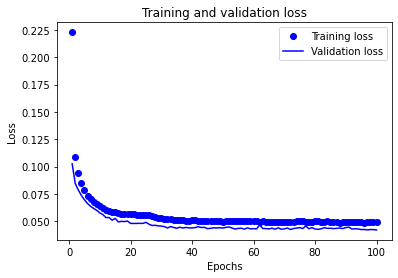

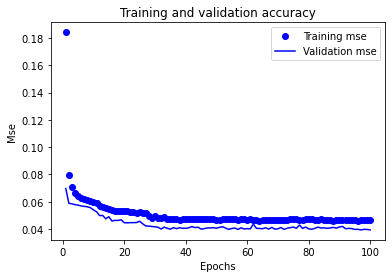

In [51]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mse = history_dict['mse']
epochs = range(1, len(mse) + 1)
 
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()# 
mse_values = history_dict['mse']
val_mse_values = history_dict['val_mse']
 
plt.plot(epochs, mse_values, 'bo', label = 'Training mse')
plt.plot(epochs, val_mse_values, 'b', label = 'Validation mse')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Mse')
plt.legend()
plt.show()

# 预测和文件输出

## 测试数据提取

In [52]:
data_test

,id,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,package,promotion_last_5years,division,salary
0,4615,0.78,4,260.71,2,0,4,0,9,2
1,1680,0.96,7,275.38,5,0,1,0,5,1
2,8866,0.57,4,207.29,5,0,4,0,7,1
3,7525,0.89,5,150.70,4,0,2,0,9,2
4,5389,0.93,3,141.23,2,0,4,0,8,2
...,...,...,...,...,...,...,...,...,...,...
2995,8434,0.45,3,132.90,2,0,2,0,9,1
2996,14013,0.73,4,245.77,2,0,0,0,7,1
2997,10221,0.75,4,242.90,4,0,0,0,6,1
2998,12847,0.70,3,235.52,4,0,2,0,2,0


In [53]:
test_file=data_test.iloc[:,1:]
test_file=mm.fit_transform(test_file)

In [54]:
model.predict(test_file)

array([[0.698663  ],
       [0.22289059],
       [0.67210764],
       ...,
       [0.67938054],
       [0.6791546 ],
       [0.43422318]], dtype=float32)